# Decision Tree Comparison

The text of the data set: https://www.kaggle.com/c/titanic/overview

In [395]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
#from sklearn.metrics import plot_confusion_matrix


# advantages vs disavantages 

ADVANTAGES:
-easy to implement
-good for multiple problems
-support more data type
-not need much data 
-easy to explain


DISADVANTAGES:
-low accuracy
-overfitting without regularization 




In [396]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [397]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [399]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked', 'Fare'],axis='columns',inplace=True)

In [400]:
df.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [401]:
inputs = df.drop('Survived',axis='columns')
target = df['Survived']

In [402]:
inputs.head()

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0


In [403]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [404]:
inputs['Sex'] = inputs['Sex'].map({'male': 1, 'female': 2})
inputs

,Pclass,Sex,Age
0,3,1,22.0
1,1,2,38.0
2,3,2,26.0
3,1,2,35.0
4,3,1,35.0
...,...,...,...
886,2,1,27.0
887,1,2,19.0
888,3,2,NaN
889,1,1,26.0


In [405]:
inputs['Age'] = inputs['Age'].fillna(inputs['Age'].mean())
inputs

,Pclass,Sex,Age
0,3,1,22.000000
1,1,2,38.000000
2,3,2,26.000000
3,1,2,35.000000
4,3,1,35.000000
...,...,...,...
886,2,1,27.000000
887,1,2,19.000000
888,3,2,29.699118
889,1,1,26.000000


In [406]:
x_train, x_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)
x_test2=x_train[:500]
y_test2=y_train[:500]

# Criterion Comparison: 
This parameter determines how the impurity of a split will be measured. The default value is “gini” but you can also use “entropy” as a metric for impurity.

Step for sliptiing data- using information gain, less info in top/root 
ex: for entripy we calculate in every step the gain for the nodes and the smallest extropy is put on top .

In [407]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [408]:
model.fit(x_train,y_train)
y_prediction=model.predict(x_test)

C:\Users\Iulia\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


Fitting the model with the default: GINI INDEX

In [409]:
model.score(x_test,y_test)

0.7988826815642458

In [410]:
acc_gini=accuracy_score(y_test, y_prediction)
print("Accuracy score: %s"% acc_gini)

Accuracy score: 0.7988826815642458


In [411]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_1 <= 1.50
|   |--- feature_2 <= 9.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  2.50
|   |   |   |--- feature_2 <= 0.71
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  0.71
|   |   |   |   |--- feature_2 <= 8.50
|   |   |   |   |   |--- feature_2 <= 3.50
|   |   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_2 >  1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  2.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  3.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  8.50
|   |   |   |   |   |--- class: 1
|   |--- feature_2 >  9.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- feature_2 <= 53.00
|   |   |   |   |--- feature_2 <= 47.50
|   |   |   |   |   |--- feature_2 <= 43.00
|   |   |   |   | 

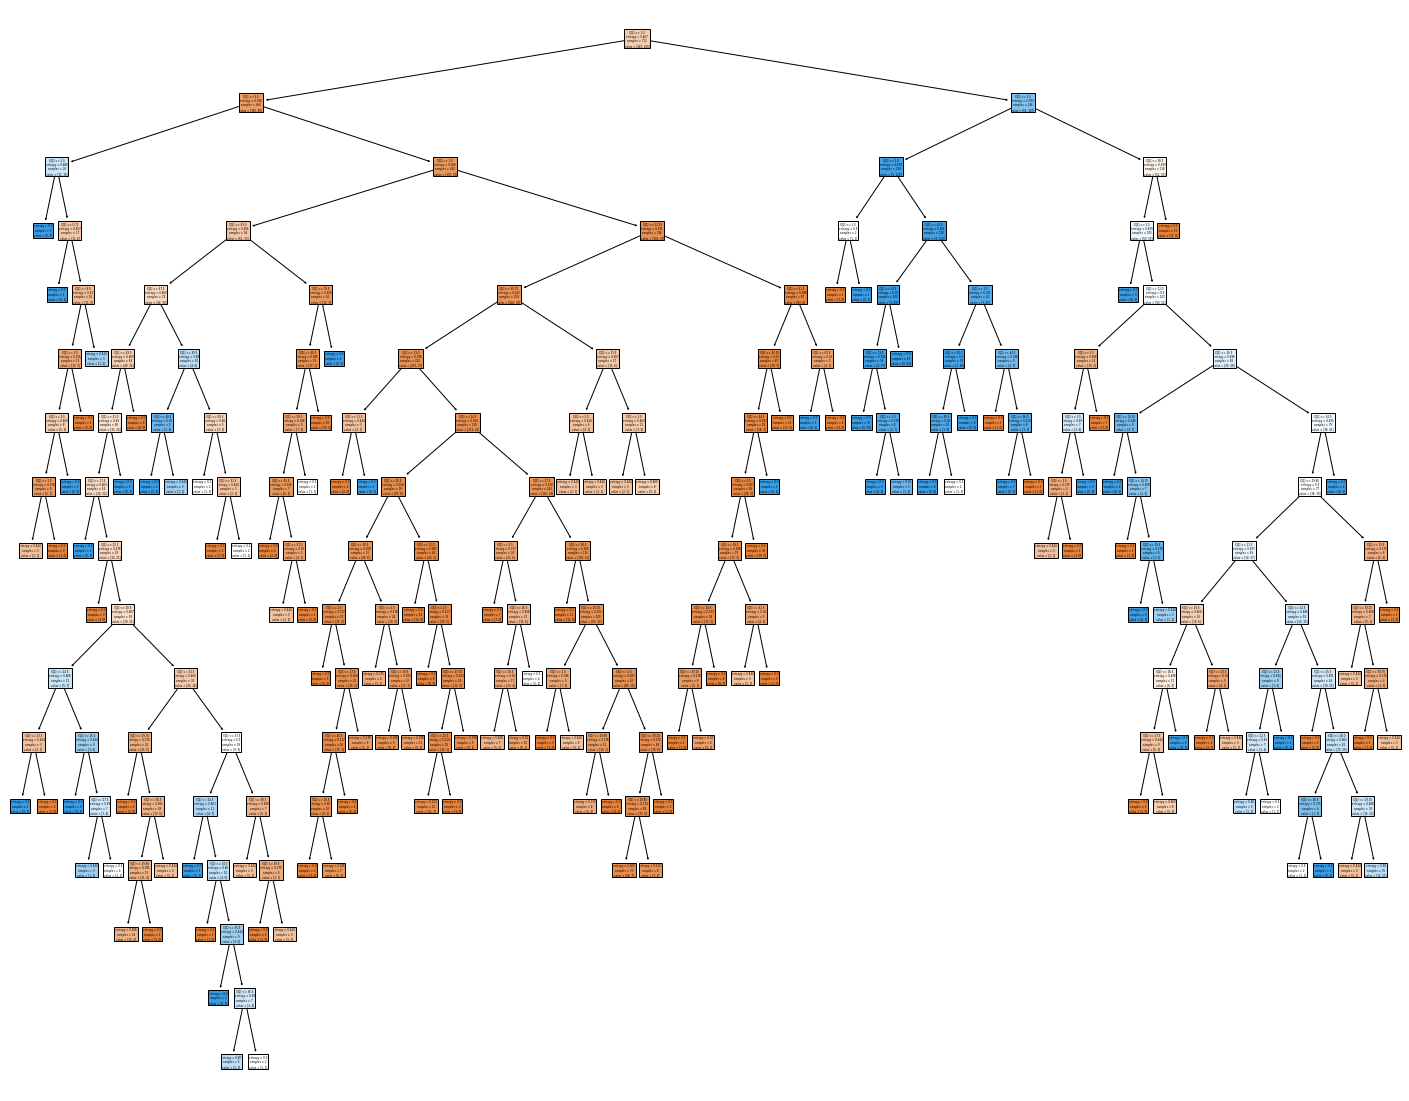

In [412]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, filled=True)

Test model on the same date we train

In [413]:
model.score(x_test2,y_test2)

0.87

Model split based on entropy 

In [414]:
model_entropy = tree.DecisionTreeClassifier(criterion='entropy')

In [415]:
model_entropy.fit(x_train,y_train)

C:\Users\Iulia\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [416]:
model_entropy.score(x_test,y_test)

0.7988826815642458

In [417]:
text_representation = tree.export_text(model_entropy)
print(text_representation)

|--- feature_1 <= 1.50
|   |--- feature_0 <= 1.50
|   |   |--- feature_2 <= 17.50
|   |   |   |--- class: 1
|   |   |--- feature_2 >  17.50
|   |   |   |--- feature_2 <= 53.00
|   |   |   |   |--- feature_2 <= 22.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  22.50
|   |   |   |   |   |--- feature_2 <= 23.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  23.50
|   |   |   |   |   |   |--- feature_2 <= 24.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  24.50
|   |   |   |   |   |   |   |--- feature_2 <= 26.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_2 >  26.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 47.50
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 43.00
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 41.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |  

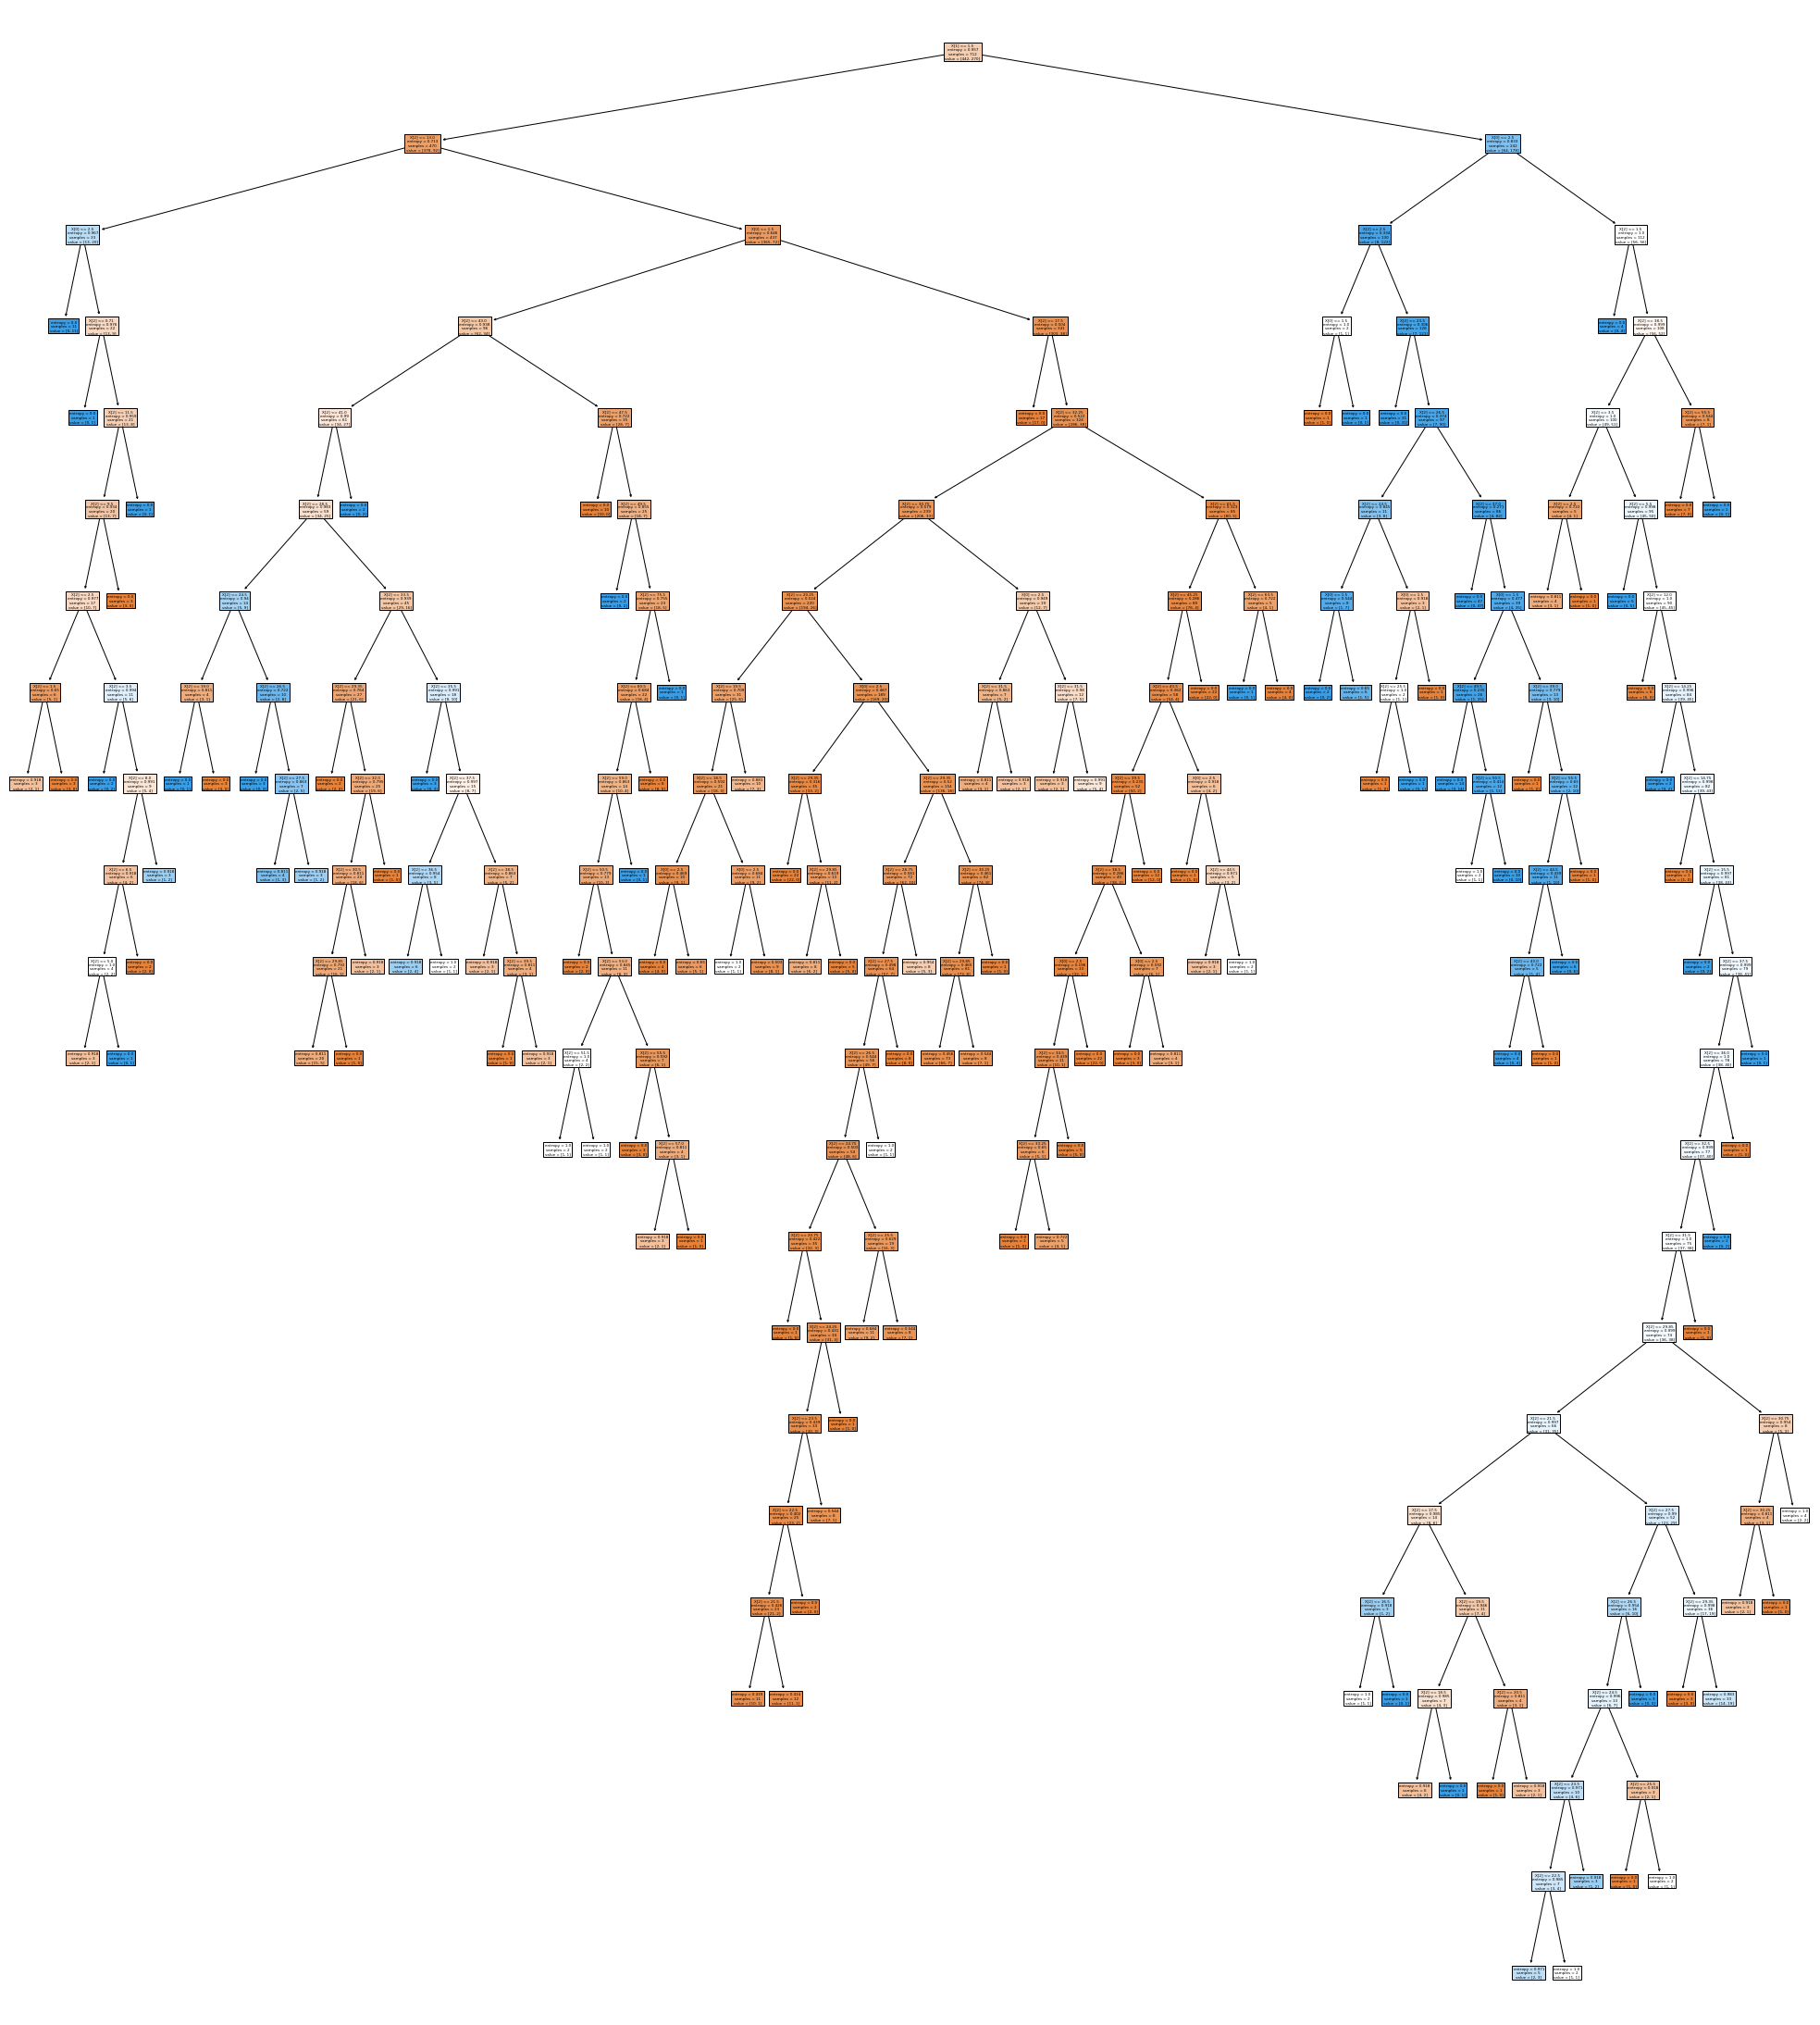

In [94]:
fig = plt.figure(figsize=(35,40))
_ = tree.plot_tree(model_entropy, filled=True)

# Conclusion:
    1. Gini is faster because it less computationally expensive than Entropy
    2. The data set tested has the similar score because be have a small dataset 
    3. Entropy is slightly better in bigger datasets, but slower (example below) 
    4. We need to focus on balance time& complexity & results

# Comparison samples split: 
        The minimum number of samples required to split an internal node

Get all data now 

In [420]:
df = pd.read_csv("titanic.csv",index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [422]:
columns_with_missing_values = {
 'Cabin':'None', #Cabin number
 'Embarked': 'None', #Port of Embarkation
 'Age': df['Age'].mean()
}

In [423]:
for key,value in columns_with_missing_values.items():
    if value is not None:
        df[key].fillna(value=value, inplace=True)
        
from scipy.stats import zscore
for column in list(df.columns):
    if df[column].dtype in ['float64','int64']:
        z_scores = zscore(df[column])
        abs_z_scores = np.abs(z_scores)
        filtered_entries = np.where(abs_z_scores < 3)
        df= df.loc[df.index[filtered_entries]]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  820 non-null    int64  
 1   Pclass    820 non-null    int64  
 2   Name      820 non-null    object 
 3   Sex       820 non-null    object 
 4   Age       820 non-null    float64
 5   SibSp     820 non-null    int64  
 6   Parch     820 non-null    int64  
 7   Ticket    820 non-null    object 
 8   Fare      820 non-null    float64
 9   Cabin     820 non-null    object 
 10  Embarked  820 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.9+ KB


In [424]:
data_columns = [ c for c in  df.columns if c != 'Survived']

Y = df['Survived']
X = df[data_columns]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

In [427]:
le = LabelEncoder()
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        X_train[column].astype('category')
        X_train[column] = le.fit_transform(X_train[column])
        X_test[column].astype('category')
        X_test[column] = le.fit_transform(X_test[column])

In [438]:
decision_tree = tree.DecisionTreeClassifier() #min_samples_split by default=2
decision_tree.fit(X_train,Y_train)
gini_score=decision_tree.score(X_test,Y_test)


decision_tree = tree.DecisionTreeClassifier(criterion='entropy') #min_samples_split by default=2
decision_tree.fit(X_train,Y_train)
entropy_score=decision_tree.score(X_test,Y_test)

print('Accuracy score using gini: %.4s'%gini_score)
print('Accuracy score using entropy: %.4s'%entropy_score)

Accuracy score using gini: 0.47
Accuracy score using entropy: 0.65


C:\Users\Iulia\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Iulia\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

In [447]:
decision_tree_no_overfit = tree.DecisionTreeClassifier(min_samples_split=80) 
decision_tree_no_overfit.fit(X_train,Y_train)
split=decision_tree_no_overfit.score(X_test,Y_test)


decision_tree_no_overfit = tree.DecisionTreeClassifier(min_samples_split=80,max_depth=3) 
decision_tree_no_overfit.fit(X_train,Y_train)
split_depth=decision_tree_no_overfit.score(X_test,Y_test)

print('Accuracy score update samples_split: %.4s'%split)
print('Accuracy score using samples_split & max_depth: %.4s'%split_depth)

Accuracy score update samples_split: 0.79
Accuracy score using samples_split & max_depth: 0.79


C:\Users\Iulia\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Iulia\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

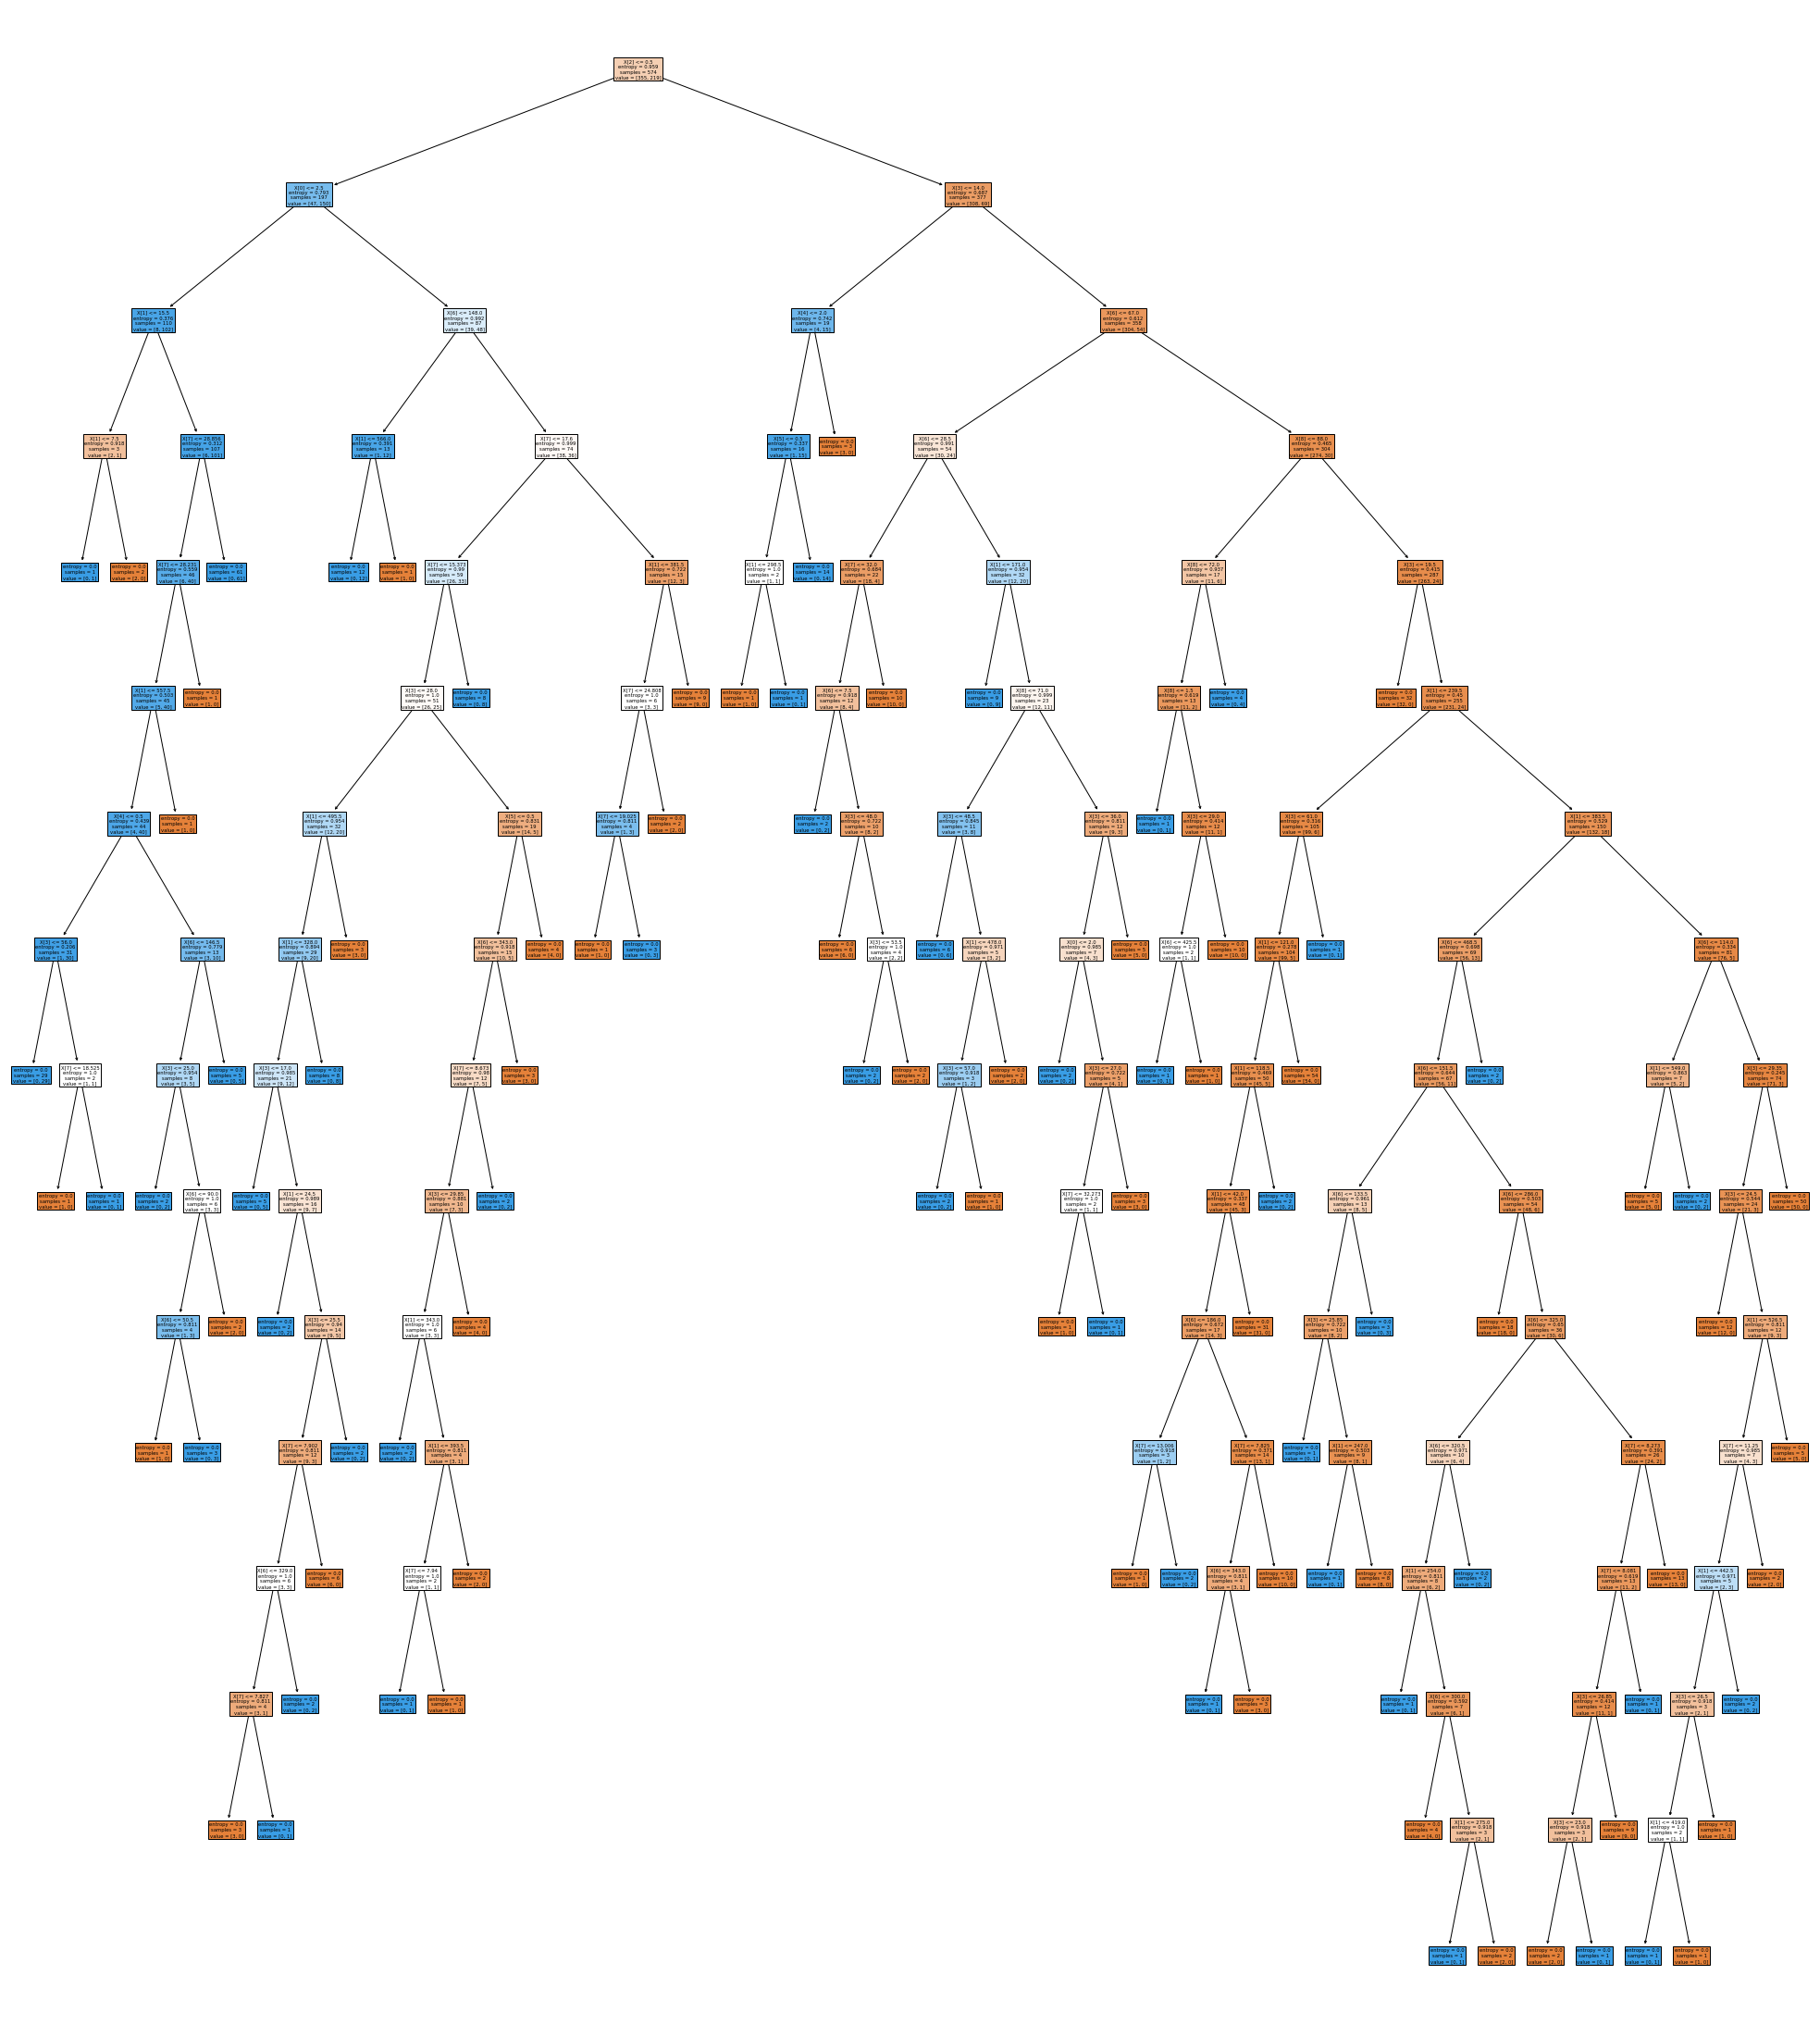

In [448]:
fig = plt.figure(figsize=(35,40))
_ = tree.plot_tree(decision_tree, filled=True)

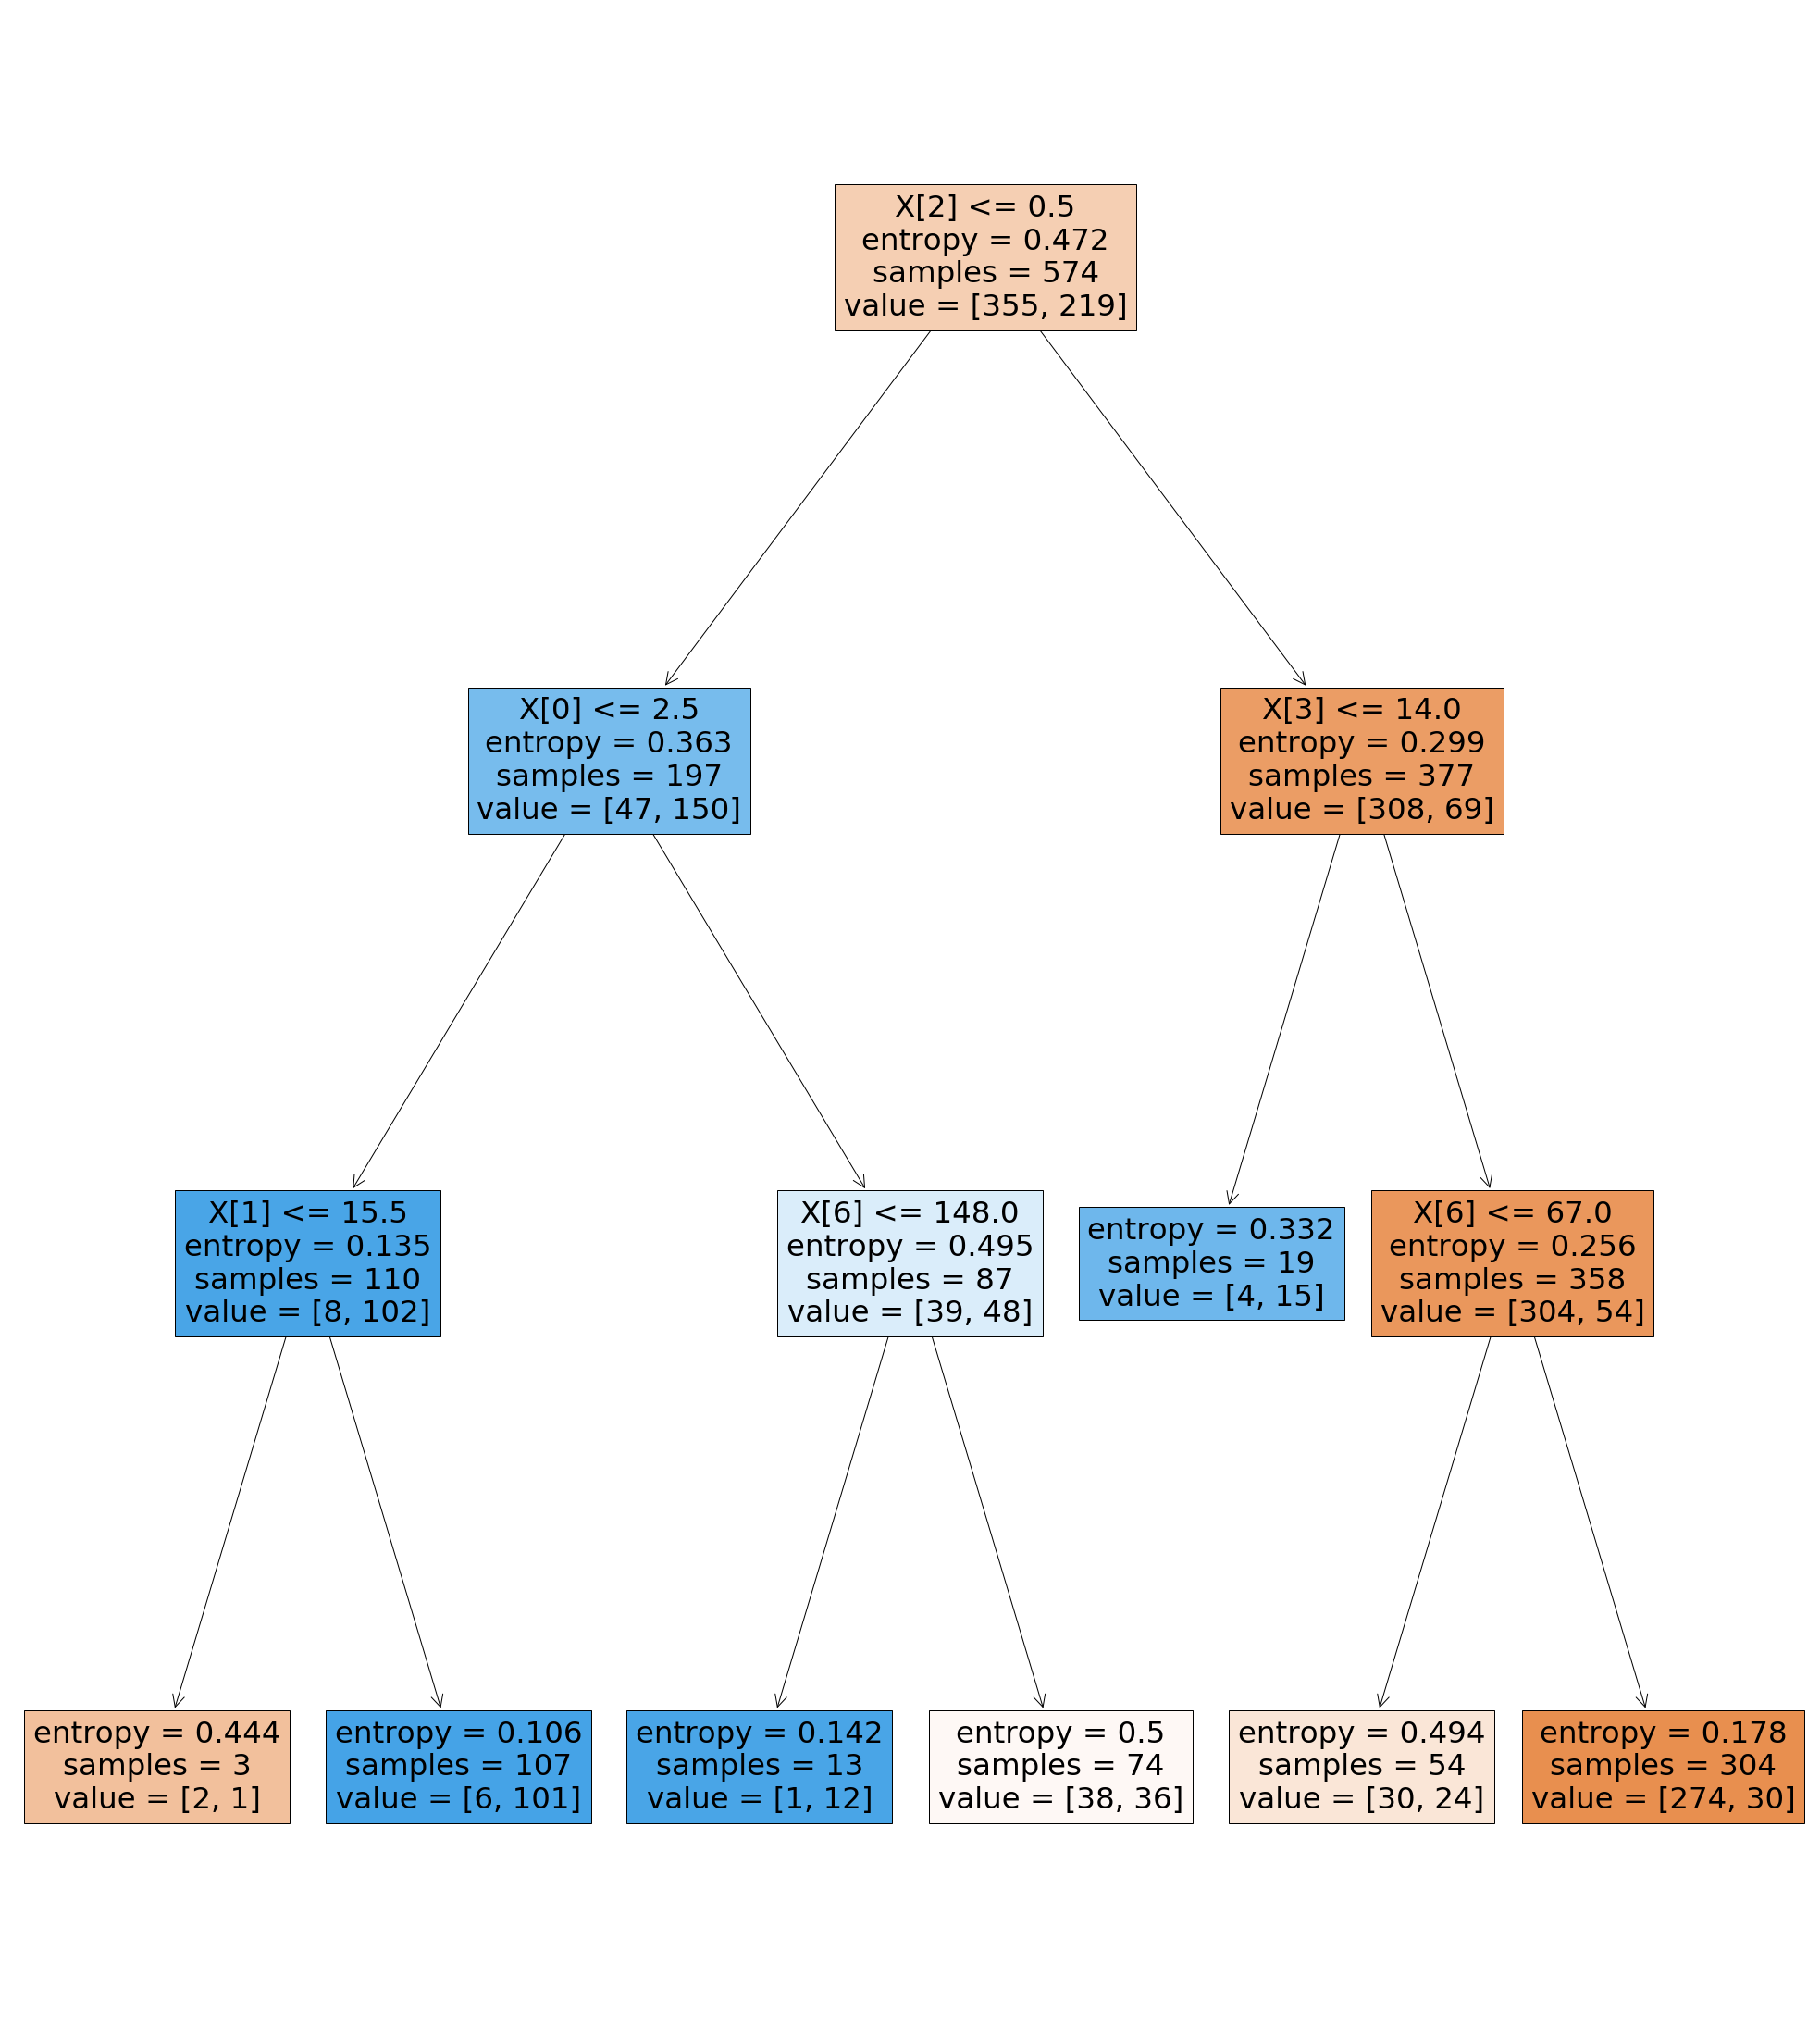

In [449]:
fig = plt.figure(figsize=(35,40))
_ = tree.plot_tree(decision_tree_no_overfit, filled=True)

# Conclusion
    In the first case, we deal with overfitting and changing numbers of samples we consider to split or adjusting the depth sizeof the tree become good solutions to overcome it.
    
    The most important features are: Sex, Pclass(Ticket class) and Age.
    

In [452]:
X_train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')